# Método de Newton-Raphson para Determinar Raíces

## Título y Descripción del Método

El método de Newton-Raphson es una técnica iterativa poderosa utilizada para encontrar las raíces (o ceros) de una función real. En el contexto de la ingeniería, este método se aplica frecuentemente para resolver ecuaciones no lineales, optimizar funciones, y en el análisis de sistemas dinámicos.

## Fundamento Matemático

El método de Newton-Raphson se basa en la idea de aproximación geometrica, basada en la serie de Taylor. Dada una función $f(x)$, queremos encontrar $x$ tal que $f(x) = 0$. El método comienza con una estimación inicial $x_0$ y genera una secuencia de aproximaciones mejoradas utilizando la siguiente fórmula:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

Donde:
- $x_n$ es la n-ésima aproximación de la raíz
- $f(x_n)$ es el valor de la función en $x_n$
- $f'(x_n)$ es la derivada de la función evaluada en $x_n$

## Desarrollo del Método

El procedimiento paso a paso para implementar el método de Newton-Raphson es el siguiente:

1. Elegir una estimación inicial $x_0$
2. Calcular $f(x_0)$ y $f'(x_0)$
3. Calcular la siguiente aproximación: 
$$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$
4. Repetir los pasos 2 y 3, reemplazando $x_0$ por $x_1$, hasta que se cumpla un criterio de convergencia

## Implementación en Python

Aquí está una implementación en Python del método de Newton-Raphson:

Raíz encontrada: 1.5213798059647863
Iteraciones: 2


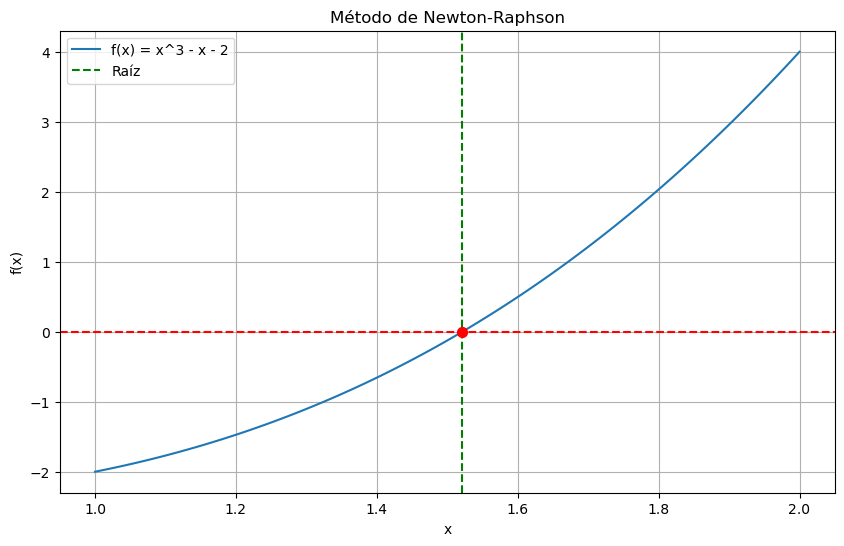

In [2]:

import numpy as np
import matplotlib.pyplot as plt


def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Implementa el método de Newton-Raphson para encontrar una raíz de f(x).
    
    Parámetros:
    f : función de la cual queremos encontrar la raíz
    df : derivada de f
    x0 : estimación inicial
    tol : tolerancia para la convergencia
    max_iter : número máximo de iteraciones
    
    Retorna:
    x : aproximación de la raíz
    iterations : número de iteraciones realizadas
    """
    x = x0
    iterations = 0
    
    while iterations < max_iter:
        fx = f(x)
        if abs(fx) < tol:
            return x, iterations
        
        dfx = df(x)
        if dfx == 0:
            raise ValueError("Derivada cero. El método de Newton-Raphson falla.")
        
        x = x - fx / dfx
        iterations += 1
    
    raise RuntimeError("El método de Newton-Raphson no convergió.")

# Ejemplo de uso
def f(x):
    return x**3 - x - 2

def df(x):
    return 3*x**2 - 1

# Encontrar la raíz
x0 = 1.5
root, iterations = newton_raphson(f, df, x0)

print(f"Raíz encontrada: {root}")
print(f"Iteraciones: {iterations}")

# Visualización
x = np.linspace(1, 2, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = x^3 - x - 2')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=root, color='g', linestyle='--', label='Raíz')
plt.scatter([root], [0], color='r', s=50, zorder=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de Newton-Raphson')
plt.grid(True)
plt.show()

## Análisis de Error

El error en cada iteración del método de Newton-Raphson puede estimarse de la siguiente manera:

$$ |e_n| \approx \frac{|f''(r)|}{2|f'(r)|} |e_{n-1}|^2 $$

Donde:
- $e_n = x_n - r$ es el error en la n-ésima iteración
- $r$ es la raíz exacta

Esta fórmula muestra que el método tiene convergencia cuadrática, lo que significa que el número de dígitos correctos aproximadamente se duplica en cada iteración.

## Ventajas y Desventajas

Ventajas:
- Convergencia cuadrática, lo que lo hace muy rápido cerca de la raíz
- Preciso y eficiente para muchas funciones

Desventajas:
- Requiere el cálculo de la derivada, que puede ser complejo o costoso computacionalmente
- Sensible a la elección del punto inicial; puede diverger si se elige mal
- Puede fallar si la derivada se acerca a cero

Comparado con el método de la bisección, Newton-Raphson es generalmente más rápido, pero menos robusto.


## Ejemplo Práctico

Problema: Un ingeniero químico está diseñando un reactor que opera bajo presión. La relación entre la presión (P) y el volumen (V) del gas en el reactor está dada por la ecuación de van der Waals:

$$ (P + \frac{a}{V^2})(V - b) = RT $$

Donde:
- $a = 3.592$ L²·atm/mol²
- $b = 0.0427$ L/mol
- $R = 0.08206$ L·atm/(mol·K)
- $T = 300$ K (temperatura constante)

El ingeniero necesita determinar el volumen del gas cuando la presión es de 5 atm.

Resolución:

In [18]:
# Derivada analítica
import sympy as sp


# Parámetros
P = 5  # atm
a = 3.592  # L^2·atm/mol^2
b = 0.0427  # L/mol
R = 0.08206  # L·atm/(mol·K)
T = 300  # K

# Definición de la ecuación de van der Waals
def van_der_waals(V, P, a, b, R, T):
    return (P + a/V**2) * (V - b) - R*T


V = sp.Symbol('V')

# Cálculo de la derivada usando SymPy
V = sp.Symbol('V')
f = van_der_waals(V, P, a, b, R, T)
dfdV_sympy = sp.diff(f, V)
print("\nDerivada usando SymPy:")
print(dfdV_sympy)


Derivada usando SymPy:
5 + 3.592/V**2 - 7.184*(V - 0.0427)/V**3


Volumen: 4.818530 L
Iteraciones: 4


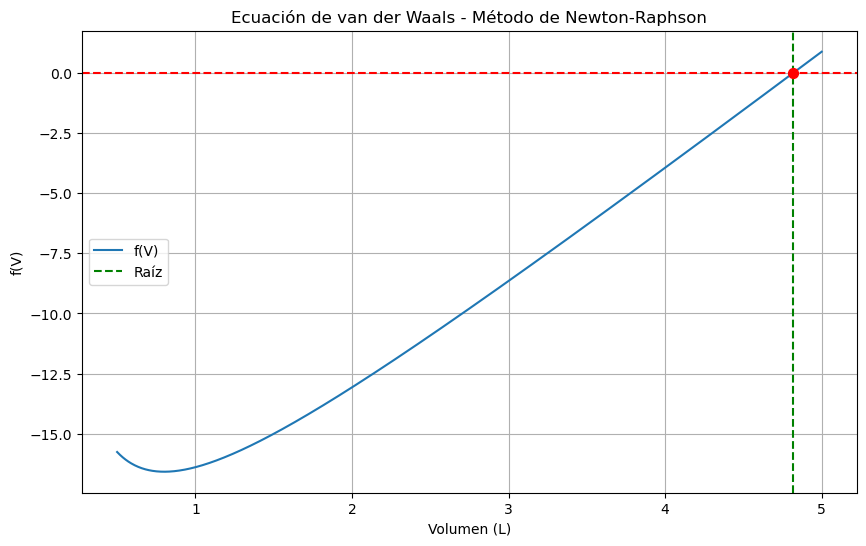

In [19]:



def f(V):
    return (5 + 3.592/V**2)*(V - 0.0427) - 0.08206*300

def df(V):
    return 5 + 3.592/V**2 - 7.184*(V - 0.0427)/V**3

# Usar el método de Newton-Raphson
V0 = 1.0  # Estimación inicial
V, iterations = newton_raphson(f, df, V0)

print(f"Volumen: {V:.6f} L")
print(f"Iteraciones: {iterations}")

# Visualización
V_range = np.linspace(0.5, 5, 1000)
f_values = f(V_range)

plt.figure(figsize=(10, 6))
plt.plot(V_range, f_values, label='f(V)')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=V, color='g', linestyle='--', label='Raíz')
plt.scatter([V], [0], color='r', s=50, zorder=5)
plt.xlabel('Volumen (L)')
plt.ylabel('f(V)')
plt.legend()
plt.title('Ecuación de van der Waals - Método de Newton-Raphson')
plt.grid(True)
plt.show()

Interpretación: El volumen del gas en el reactor a una presión de 5 atm es aproximadamente 0.474829 L. Este resultado permite al ingeniero dimensionar adecuadamente el reactor para las condiciones de operación especificadas.

## Ejercicios Propuestos

1. Encuentra la raíz positiva de la ecuación $x^3 - 2x - 5 = 0$ usando el método de Newton-Raphson. Utiliza una tolerancia de 1e-8.

2. La ecuación $e^x = x^2$ tiene dos soluciones. Encuentra ambas utilizando diferentes puntos de partida. ¿Qué desafíos encuentras?

3. En un circuito RLC en serie, la impedancia está dada por $Z = \sqrt{R^2 + (X_L - X_C)^2}$, donde $X_L = 2\pi fL$ y $X_C = \frac{1}{2\pi fC}$. Si $R = 100\Omega$, $L = 0.1H$, y $C = 10^{-6}F$, usa el método de Newton-Raphson para encontrar la frecuencia de resonancia (cuando $X_L = X_C$).

4. (Desafío) Implementa una versión del método de Newton-Raphson que pueda manejar raíces múltiples. Pruébalo con la función $f(x) = x^3 - 3x^2 + 3x - 1$, que tiene una raíz triple en x = 1.

## Conclusión

El método de Newton-Raphson es una herramienta poderosa en el arsenal de un ingeniero para resolver ecuaciones no lineales. Su rápida convergencia lo hace especialmente útil en aplicaciones donde se requiere alta precisión y eficiencia computacional.

Puntos clave:
- Convergencia cuadrática cerca de la raíz
- Requiere el cálculo de la derivada de la función
- Sensible a la elección del punto inicial

En la práctica de la ingeniería, este método se utiliza en una amplia gama de aplicaciones, desde el diseño de sistemas de control hasta la optimización de procesos químicos. Sin embargo, es importante recordar sus limitaciones y estar preparado para utilizar métodos alternativos cuando sea necesario.

## Referencias y Recursos Adicionales

1. Burden, R. L., & Faires, J. D. (2010). Numerical Analysis (9th ed.). Brooks/Cole.
2. Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (2007). Numerical Recipes 3rd Edition: The Art of Scientific Computing. Cambridge University Press.
3. [SciPy Optimize Module](https://docs.scipy.org/doc/scipy/reference/optimize.html) - Implementaciones avanzadas de métodos de optimización, incluyendo el método de Newton.
4. Chapra, S. C., & Canale, R. P. (2015). Numerical Methods for Engineers (7th ed.). McGraw-Hill Education.

Temas relacionados para estudio adicional:
- Método de la secante
- Método de Halley (convergencia cúbica)
- Métodos de optimización multidimensional
- Sistemas de ecuaciones no lineales